## Exercise 2 

### Importing libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os.path

### Part A.) Data Preprocessing

In [11]:
DatasetBasePath = 'Dataset'

#### Read Airline and demand dataset

In [12]:
path_to_airline_dataset =  os.path.join(DatasetBasePath,'airq402.data') 
airline_data=pd.read_csv(path_to_airline_dataset,header = None, delimiter=r"\s+")
airline_data.columns= ['city1', 'city2', 'avg_Fare', 'distance', 'avg_weekly_passengers', 'market_leading', 'market_share', 'avg_fare', 'low_priceair','market share','price']


#### Read Winequality dataset

In [10]:

path_to_wine_dataset =  os.path.join(DatasetBasePath,'winequality-red.csv') 
winequality_red_data=pd.read_csv(path_to_wine_dataset, sep=';')

#### Read Parkinsons dataset

In [14]:
path_to_wine_dataset =  os.path.join(DatasetBasePath,'parkinsons_updrs.data') 

parkinsons_upd=pd.read_csv(path_to_wine_dataset, sep=',')

<hr style="border:2px solid gray"> </hr>

In [23]:
airline_data.dtypes

city1                     object
city2                     object
avg_Fare                 float64
distance                   int64
avg_weekly_passengers    float64
market_leading            object
market_share             float64
avg_fare                 float64
low_priceair              object
market share             float64
price                    float64
dtype: object

<p>All three datasets are loaded as required. Only the airfare and demand dataset had non-numeric
columns <b> (city1, city2, market_leading, low_priceair)</b> that were converted into numeric columns using ‘one-hot encoding’.</p>
<p>Build-in pandas function get_dumies  was used to change categorical data present in the dataset to one hot encoding. E.g, if you have a column with four categories data then it will replace that column with four new columns each representing each category as 1 while other values will be zero.</p>

### Converting Non Numeric values in Airline Data to Numeric Using One-Hot Encoding

In [24]:
#dummy_values=pd.get_dummies(airline_data)
cols_to_transform = [ 'city1', 'city2', 'market_leading', 'low_priceair']
df_with_dummies = pd.get_dummies(airline_data, columns = cols_to_transform)
df_with_dummies.head(20)

,avg_Fare,distance,avg_weekly_passengers,market_share,avg_fare,market share,price,city1_ABQ,city1_ACY,city1_ALB,...,low_priceair_G4,low_priceair_HP,low_priceair_NK,low_priceair_NW,low_priceair_SY,low_priceair_TZ,low_priceair_UA,low_priceair_US,low_priceair_WN,low_priceair_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,135.17,1204,199.02,40.68,137.97,17.09,127.69,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,152.85,2237,237.17,59.94,148.59,59.94,148.59,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,190.73,2467,191.95,17.89,205.06,16.59,174.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,129.35,1073,550.54,76.84,127.69,76.84,127.69,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,134.17,1130,202.93,35.40,132.91,26.40,124.78,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<hr style="border:2px solid gray"> </hr>

### Checking for missing values or NA

In [25]:
NaN_airline_data = df_with_dummies[df_with_dummies.isnull().any(1)]
NaN_winequality_red_data = winequality_red_data[winequality_red_data.isnull().any(1)]
NaN_parkinsons_upd = parkinsons_upd[parkinsons_upd.isnull().any(1)]

In [26]:
NaN_airline_data

,avg_Fare,distance,avg_weekly_passengers,market_share,avg_fare,market share,price,city1_ABQ,city1_ACY,city1_ALB,...,low_priceair_G4,low_priceair_HP,low_priceair_NK,low_priceair_NW,low_priceair_SY,low_priceair_TZ,low_priceair_UA,low_priceair_US,low_priceair_WN,low_priceair_YX


In [27]:
NaN_winequality_red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [28]:
NaN_parkinsons_upd

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE


### All three datasets were checked for missing or NaN values but no such values were present.

<hr style="border:2px solid gray"> </hr>

### Splitting Dataset

<p>The Dataset will be split into 80% Train set and 20% Test using the function below:</p>

In [49]:
def DataSplit(df,column):
    X_Data = df.drop([column],axis=1)        # Dropping price column from X_Data
    Y_Data= np.array(df[column]).transpose()
    
    X_Data.insert(0,1,np.ones(len(X_Data)))        # Adding Bias
    
    num_of_rows = int(len(X_Data) * 0.8)
    
    X_Train_Data = X_Data.iloc[:num_of_rows,:]        #indexes rows for training data
    X_Test_Data = X_Data.iloc[num_of_rows:,:]      #indexes rows for test data
    
    np.random.shuffle(X_Data.values)  #shuffles data to make it random 
        
    Y_Train_Data = Y_Data[0:num_of_rows]#indexes rows for training data
    Y_Test_Data = Y_Data[num_of_rows:]
    
    return X_Train_Data,Y_Train_Data,X_Test_Data, Y_Test_Data

<p>This function is used later for splitting all the given datasets. </p>

<hr style="border:2px solid gray"> </hr>

### Part B.) Linear Regression with Real-World Data

###  Minimizing loss using gradient descent algorithm

#### Function to calculate loss

In [45]:
def loss_function (beta,X_Train,Y_Train):
    # y_hat=X*beta
    y_prediction = np.dot(X_Train,beta)
    loss_function = np.matmul((Y_Train-y_prediction).T,(Y_Train-y_prediction))
    return loss_function

#### Function to calculate derivative of loss function

In [46]:
def loss_function_derivative(beta,X_Train,Y_Train):
    # gradient=-2*XT*(Y-X*beta)
    grad_loss = -2 * np.dot(X_Train.T, Y_Train - np.dot(X_Train, beta))
    return grad_loss

#### Function to calculate RMSE error

In [47]:
# RMSE on Test Data
def Root_Mean_Square_Error(initial_betas,X_Test_Data,Y_Test_Data):
    RMSE=np.sqrt(np.mean(Y_Test_Data-np.dot(X_Test_Data, initial_betas))**2)
    return RMSE


#### Minimize loss function using gradient descent

<p>The loss function to be minimized is the least squares loss. In each iteration the difference between the previous function value and the current function value is calculated and plotted at the end. Also ‘Root Mean Squared Error’ is calculated in each iteration and plotted at the end.</p>

In [316]:
def minimize_GD(alpha,X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data,Iterations,Title):
    result = []
    rmse=[]
    betas = np.zeros((X_Train_Data.shape[1]))
    for i in range(0,Iterations): 
        loss = Y_Train_Data - np.dot(X_Train_Data, betas)
        betas = betas - alpha * (-2 * np.dot(X_Train_Data.T, loss))
        newLoss = np.sum(np.square(Y_Train_Data - np.dot(X_Train_Data, betas)))
        result.append(np.abs(newLoss - np.sum(np.square(loss))))
        rmse.append(np.sqrt(np.mean((Y_Test_Data - np.dot(X_Test_Data, betas))**2)))
        
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
    ax[0].set_title(Title)
    ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi)')
    ax[0].plot(result, 'green')
    
    ax[1].set_title(Title)
    ax[1].set(xlabel='No of Iterations', ylabel='RMSE')
    ax[1].plot(rmse, 'green')
    
    
    
    return

<hr style="border:2px solid gray"> </hr>

### Linear Regression on Airfare and Demand Dataset:

<p>For this dataset I do not drop any columns as the positive and negative correlation with the target column ‘price’ are very small and would not make much difference.</p>

In [52]:
df_with_dummies.corr()

,avg_Fare,distance,avg_weekly_passengers,market_share,avg_fare,market share,price,city1_ABQ,city1_ACY,city1_ALB,...,low_priceair_G4,low_priceair_HP,low_priceair_NK,low_priceair_NW,low_priceair_SY,low_priceair_TZ,low_priceair_UA,low_priceair_US,low_priceair_WN,low_priceair_YX
avg_Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410,-0.015512,-0.043395,-0.024907,...,-0.023987,0.120318,-0.060285,0.070318,0.045435,0.032484,0.157407,0.135060,-0.383648,0.019288
distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239,-0.019194,-0.012393,0.026510,...,-0.022292,0.131914,0.024836,0.040402,0.046385,0.042391,0.016713,-0.027004,-0.218735,-0.014731
avg_weekly_passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314,-0.046326,-0.027180,-0.041919,...,-0.015980,-0.010447,0.136523,-0.056569,0.012058,0.225821,-0.088678,-0.067905,0.020247,-0.018707
market_share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672,0.039731,0.123685,-0.020080,...,-0.008562,-0.012376,-0.006541,-0.059734,0.000750,-0.135279,0.070145,0.056783,0.140842,-0.010773
avg_fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511,-0.019783,-0.041540,-0.022720,...,-0.037346,0.116697,-0.064026,0.071489,0.057073,0.052165,0.159428,0.119931,-0.377977,0.016795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
low_priceair_TZ,0.032484,0.042391,0.225821,-0.135279,0.052165,-0.085219,-0.057155,-0.025400,-0.011889,-0.016848,...,-0.005936,-0.046552,-0.023923,-0.034657,-0.015752,1.000000,-0.045260,-0.062883,-0.102534,-0.010291
low_priceair_UA,0.157407,0.016713,-0.088678,0.070145,0.159428,-0.120865,0.108960,-0.032662,-0.015289,-0.021665,...,-0.007633,-0.059862,-0.030763,-0.044567,-0.020255,-0.045260,1.000000,-0.080862,-0.131851,-0.013234
low_priceair_US,0.135060,-0.027004,-0.067905,0.056783,0.119931,-0.054411,0.083681,-0.045380,-0.021241,0.007153,...,-0.010605,-0.083171,-0.042741,-0.061919,-0.028142,-0.062883,-0.080862,1.000000,-0.183189,-0.018386
low_priceair_WN,-0.383648,-0.218735,0.020247,0.140842,-0.377977,0.407897,-0.319557,0.068990,-0.034635,0.057616,...,-0.017292,-0.135615,-0.069692,-0.100963,-0.045887,-0.102534,-0.131851,-0.183189,1.000000,-0.029980


#### Splitting the dataset into train and test sets

In [50]:
target_column="price"
X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data = DataSplit(df_with_dummies, target_column)

#### Minimizing loss using gradient descent

<p>If we select <b>imax = 100</b></p>

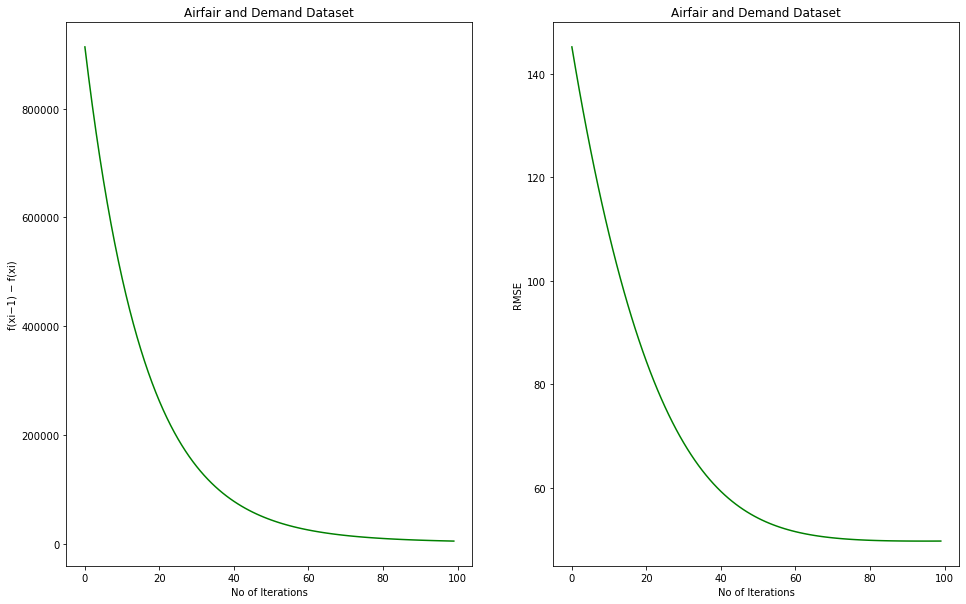

In [116]:
step_length=0.00000000001
iterations_to_run = 100
plot_title = "Airfair and Demand Dataset"
minimize_GD(step_length,X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data,iterations_to_run,plot_title)

<p>If we select <b>imax = 1000</b></p>

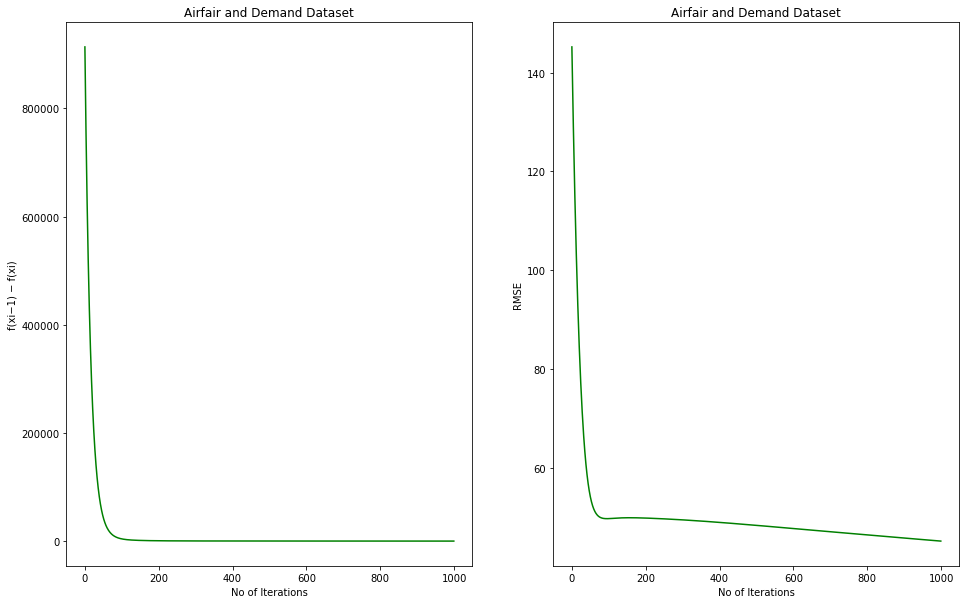

In [117]:
step_length=0.00000000001
iterations_to_run = 1000
plot_title = "Airfair and Demand Dataset"
minimize_GD(step_length,X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data,iterations_to_run,plot_title)

##### The loss function has been minimized using ‘Gradient Descent’ algorithm. Above plots show that for 100 iterations the difference between previous and current function values and the RMSE converged later than with 1000 iterations. Therefore, I calculated all my results using 1000 iterations.

#### For 1000 iterations, the graphs were plotted with three different values of step length.

<p><b>Step Length = 0.000000000001</b></p>

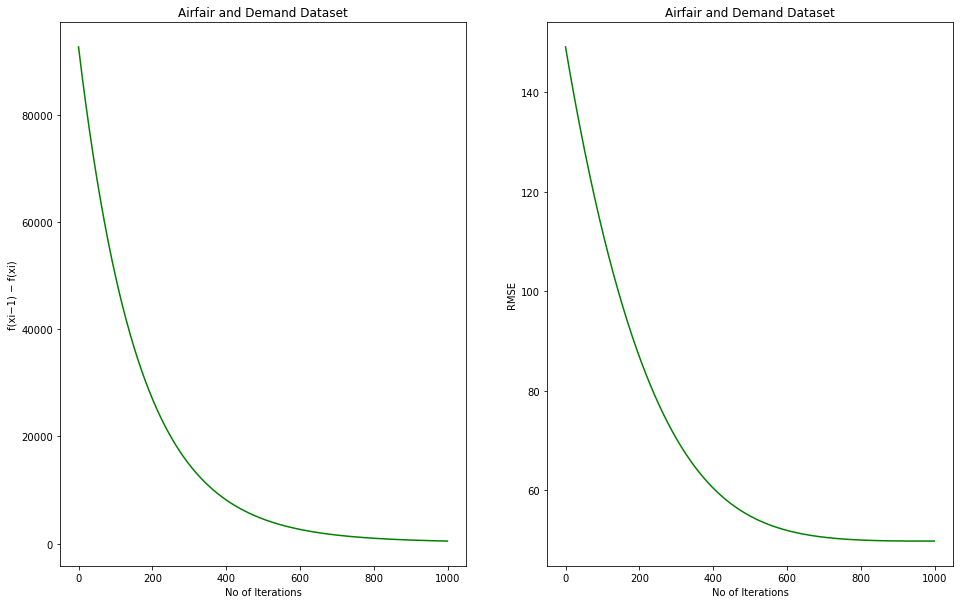

In [118]:
step_length=0.000000000001
iterations_to_run = 1000
plot_title = "Airfair and Demand Dataset"
minimize_GD(step_length,X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data,iterations_to_run,plot_title)

<p><b>Step Length = 0.00000000001</b></p>

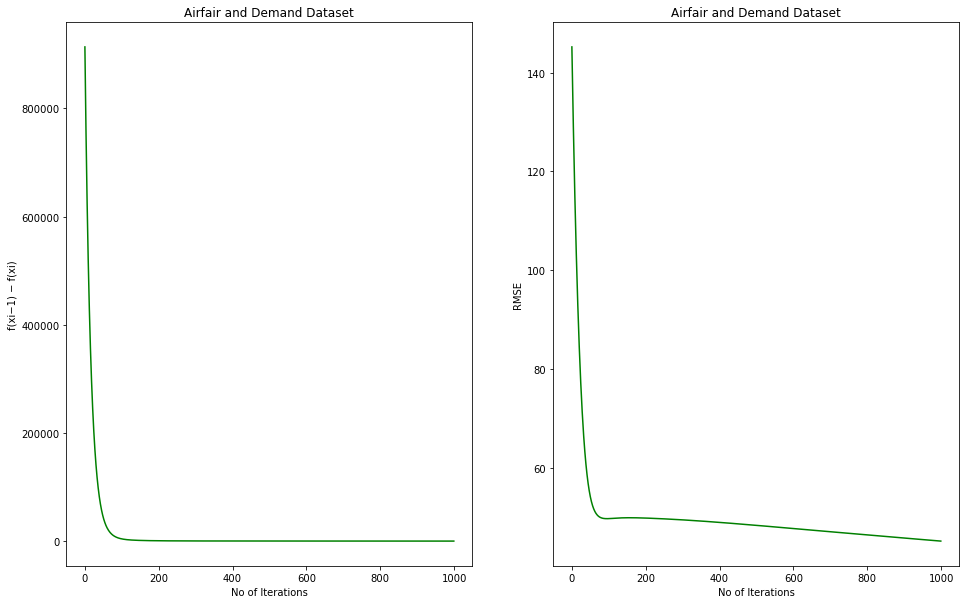

In [119]:
step_length=0.00000000001
iterations_to_run = 1000
plot_title = "Airfair and Demand Dataset"
minimize_GD(step_length,X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data,iterations_to_run,plot_title)

<p><b>Step Length = 0.0000000001</b></p>

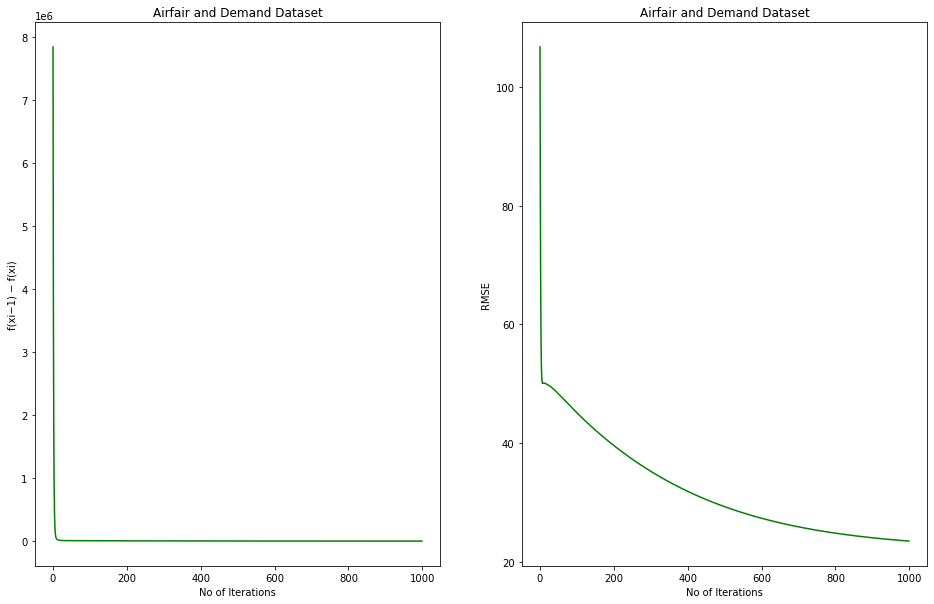

In [120]:
step_length=0.0000000001
iterations_to_run = 1000
plot_title = "Airfair and Demand Dataset"
minimize_GD(step_length,X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data,iterations_to_run,plot_title)

##### It can be seen from all |f(xi−1) − f(xi)| graphs that for larger step length difference is very high at start and it's decreasing quickly with iterations and converges fastly. For smaller step lengths difference error is large and it's taking more time to converge because steps are smaller. 

##### RMSE shows the models performance on test set. Which shows that with appropiate step length model learns very quickly

<p>It is important to note here that for step length greater than 0.0000000001 the error does not converge it diverges.</p>

<hr style="border:2px solid gray"> </hr>

### Linear Regression on Wine Quality Dataset:

<p>In this dataset, there were no non-numeric columns. Therefore, there was no need to perform one-hot encoding.No columns were dropped as the correlation between the quality column and other columns is very small and the results are similar even after dropping the columns</p>

In [121]:
winequality_red_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
# winequality_red_data.corr(method='pearson')

#### Splitting the dataset into train and test sets

In [123]:
column="quality"
Xtrain_W, Ytrain_W, Xtest_W, Ytest_W = DataSplit(winequality_red_data,column)

#### step_length=0.0000001

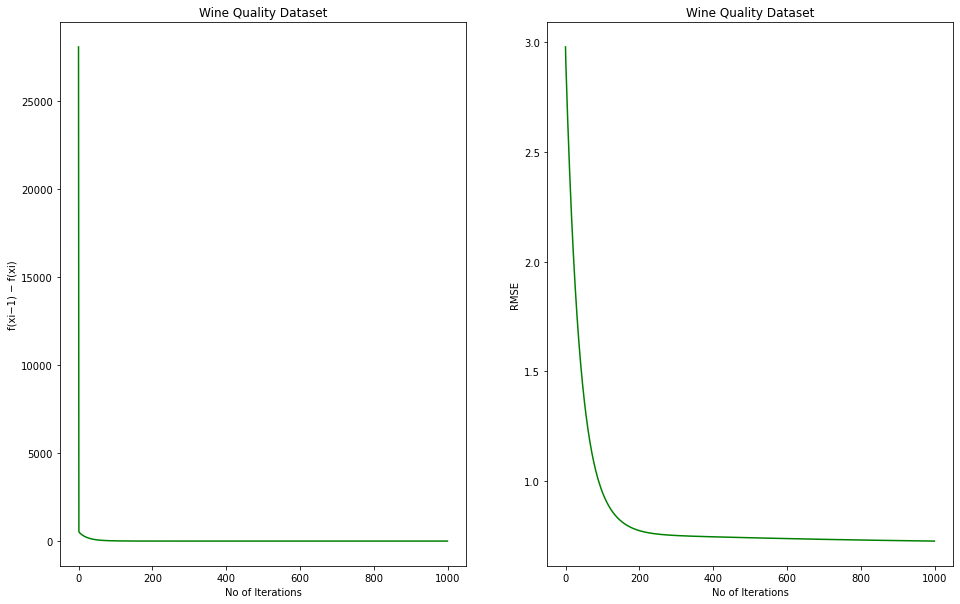

In [124]:
step_length=0.0000001
iterations_to_run = 1000
plot_title = "Wine Quality Dataset"
minimize_GD(step_length,Xtrain_W, Ytrain_W, Xtest_W, Ytest_W,iterations_to_run,plot_title)

##### The difference converged to zero quickly in the first iteration as seen in the above graph. For step length greater than 0.0000001 the difference diverges, leaving very few choices of step lengths

#### step_length=0.00000001

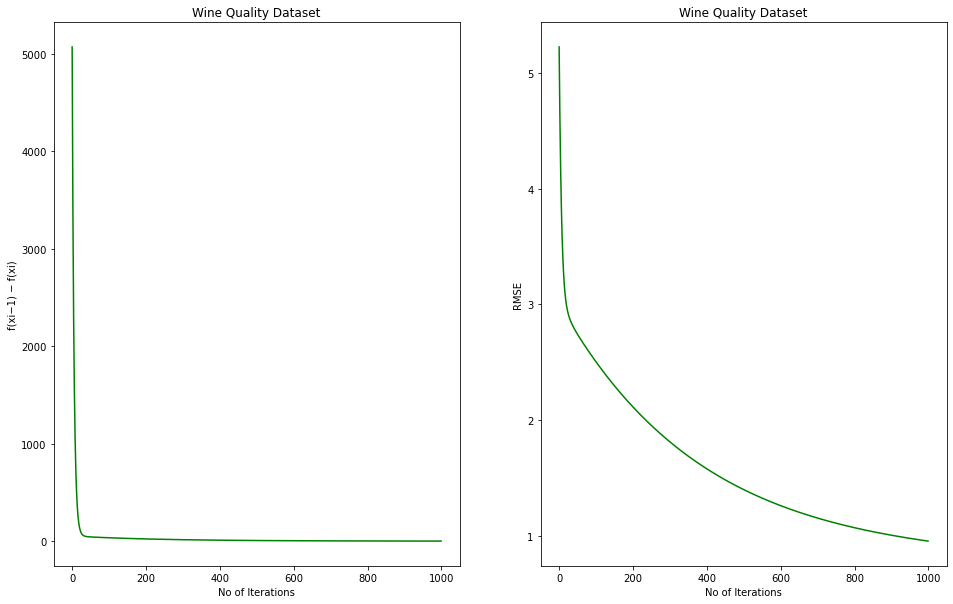

In [125]:
step_length=0.00000001
iterations_to_run = 1000
plot_title = "Wine Quality Dataset"
minimize_GD(step_length,Xtrain_W, Ytrain_W, Xtest_W, Ytest_W,iterations_to_run,plot_title)

#### step_length=0.000000001

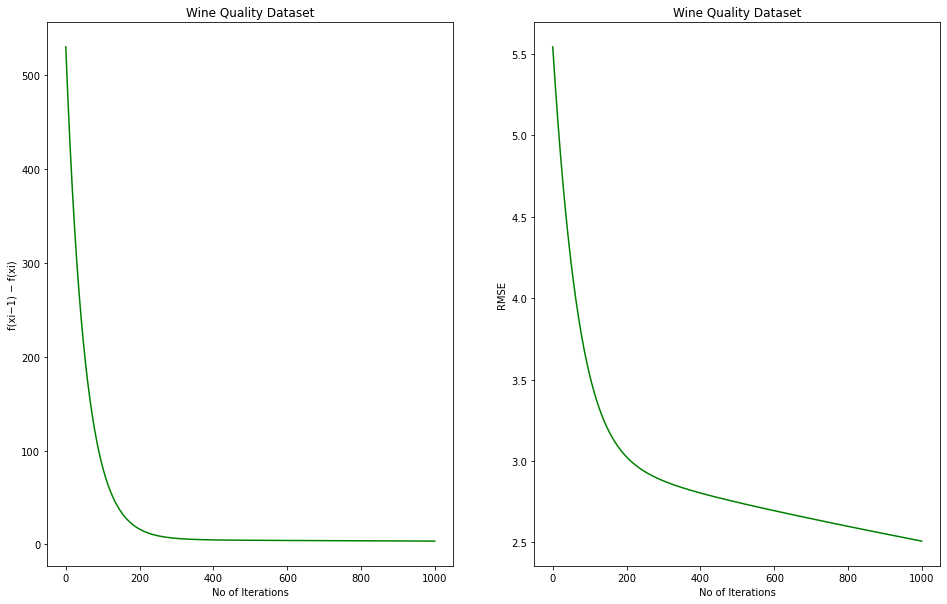

In [126]:
step_length=0.000000001
iterations_to_run = 1000
plot_title = "Wine Quality Dataset"
minimize_GD(step_length,Xtrain_W, Ytrain_W, Xtest_W, Ytest_W,iterations_to_run,plot_title)

##### The difference now takes more time to converge due to step length being too small. Same explanation implies to the plot of RMSE using these two step lengths (0.00000001, 0.000000001).

<hr style="border:2px solid gray"> </hr>

### Linear Regression on Parkisons Dataset:

<p>Similar to the wine quality dataset, there are no non-numeric columns in this dataset. Correlation among the columns was calculated and the correlation of the columns with the target column ‘total_UPDRS’ was very small. No columns were dropped. The results with dropping a few columns and without dropping any columns were compared and they were similar.</p>

In [129]:
parkinsons_upd.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [130]:
parkinsons_upd.corr(method='pearson')

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


#### Splitting dataset into train and test sets

In [132]:
column="total_UPDRS"
Xtrain_P, Ytrain_P, Xtest_P, Ytest_P = DataSplit(parkinsons_upd,column)

#### step_length=0.00000001

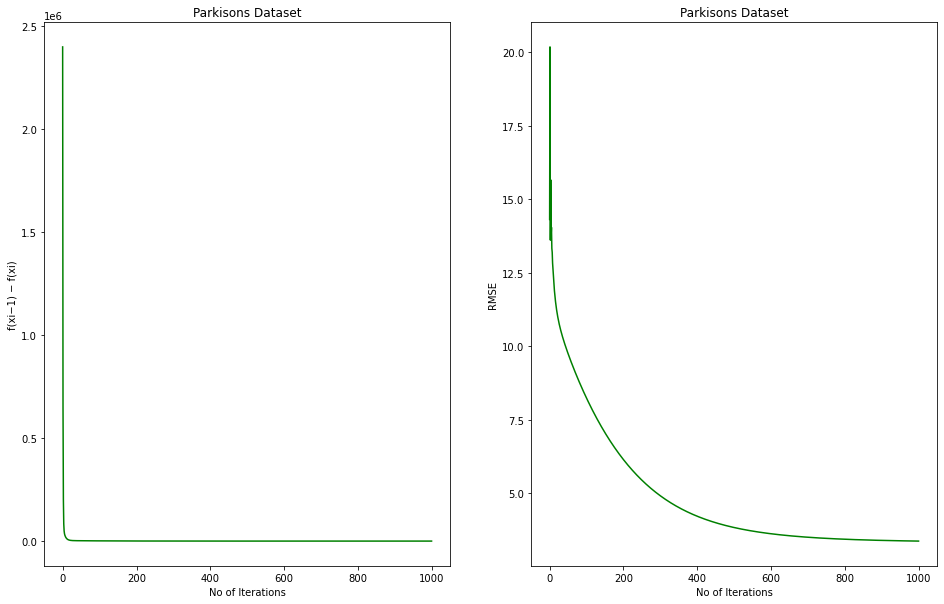

In [134]:
step_length=0.00000001
iterations_to_run = 1000
plot_title = "Parkisons Dataset"
minimize_GD(step_length, Xtrain_P, Ytrain_P, Xtest_P, Ytest_P,iterations_to_run,plot_title)

#### step_length=0.000000001

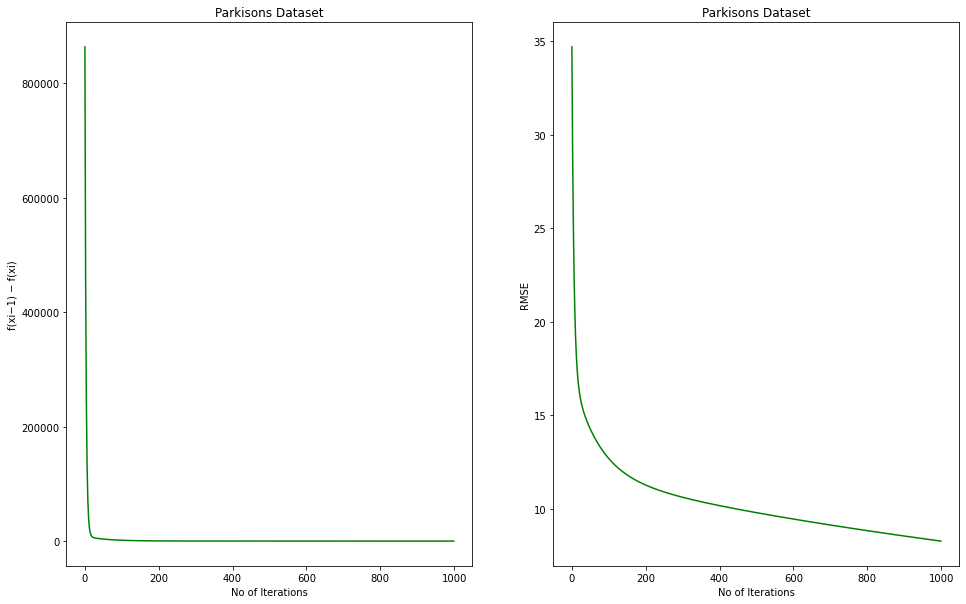

In [135]:
step_length=0.000000001
iterations_to_run = 1000
plot_title = "Parkisons Dataset"
minimize_GD(step_length, Xtrain_P, Ytrain_P, Xtest_P, Ytest_P,iterations_to_run,plot_title)

#### step_length=0.0000000001

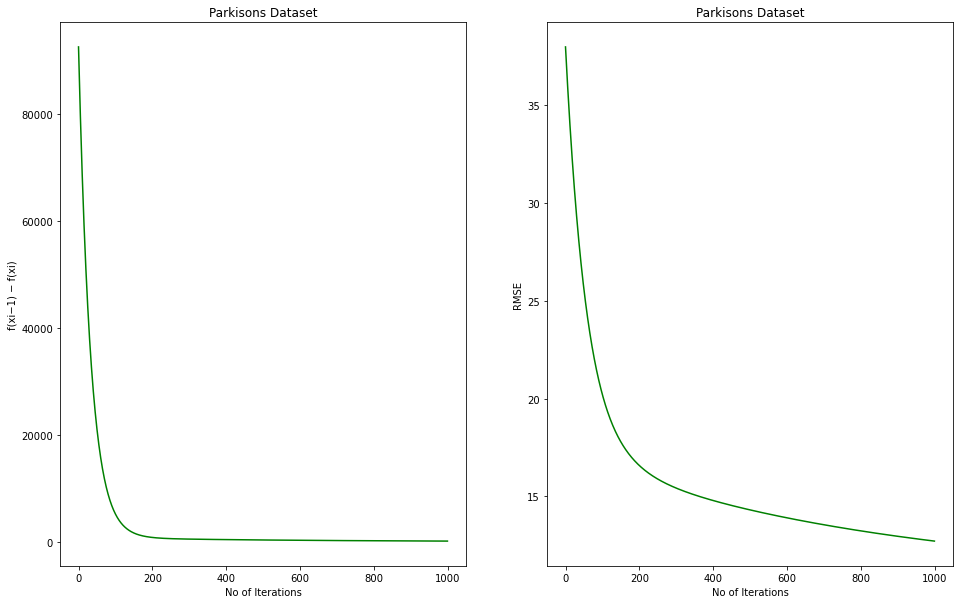

In [317]:
step_length=0.0000000001
iterations_to_run = 1000
plot_title = "Parkisons Dataset"
minimize_GD(step_length, Xtrain_P, Ytrain_P, Xtest_P, Ytest_P,iterations_to_run,plot_title)

##### The difference with step length 0.0000000001 takes more time to converge due to step length being too small. It is important to note that with step length higher than 0.00000001, the difference diverges

##### RMSE with step length 0.000000001 converges later than RMSE with step length 0.00000001. However, RMSE with step length 0.0000000001 takes more time to converge than both of the above indicating that the step length is too small

<hr style="border:2px solid gray"> </hr>

### Exercise 3.) Steplength Control for Gradient Descent

### Utility Functions

#### Steplength-backtracking

In [258]:
def stepsize_backtracking(beta,Xtrain,Ytrain):
    
    alpha=0.1
    B= 0.5
    mu = 1
    
    while (loss_function(beta,Xtrain,Ytrain) - loss_function(beta+(mu*-1*loss_function_derivative(beta,Xtrain,Ytrain)),Xtrain,Ytrain)) < (alpha*mu*np.matmul(loss_function_derivative(beta,Xtrain,Ytrain).T, loss_function_derivative(beta,Xtrain,Ytrain))):
        mu = mu * B
    return mu

In [259]:
def gradientD_BTLS(Xtrain, Ytrain, Xtest, Ytest):
    betas = np.zeros((Xtrain.shape[1]))
    newLoss = Ytrain - np.dot(Xtrain, betas)
    result_BTLS = []
    rmse_BTLS = []
    for i in range(0,1000): 
        mu_i = stepsize_backtracking(betas, Xtrain, Ytrain)
        loss = Ytrain - np.dot(Xtrain, betas)
        betas = betas - mu_i * (-2 * np.dot(Xtrain.T, loss))
        newLoss = np.sum(np.square(Ytrain - np.dot(Xtrain, betas)))
        result_BTLS.append(np.abs(newLoss - np.sum(np.square(loss))))
        rmse_BTLS.append(np.sqrt(np.mean((Ytest - np.dot(Xtest, betas))**2)/len(Xtrain)))
        
        if np.abs(newLoss - np.sum(np.square(loss))) < 0.1:
            break
    return result_BTLS, rmse_BTLS

#### Steplength-bolddriver

In [260]:
def boltdriver_steplength(beta,Xtrain,Ytrain,alpha_old,alpha_plus,alpha_minus):
    alpha=alpha_old * alpha_plus
    while (loss_function(beta,Xtrain,Ytrain)-loss_function(beta+(alpha*-1*loss_function_derivative(beta,Xtrain,Ytrain)),Xtrain,Ytrain)<=0):
        alpha=alpha * alpha_minus
    return alpha

In [264]:
def gradientD_boltdriver(Xtrain, Ytrain, Xtest, Ytest):
    betas = np.zeros((Xtrain.shape[1]))
    newLoss = Ytrain - np.dot(Xtrain, betas)
    result_BTLS = []
    rmse_BTLS = []
    for i in range(0,1000):
        aplha = boltdriver_steplength(betas, Xtrain, Ytrain,1,1.1,0.5)
        loss = Ytrain - np.dot(Xtrain, betas)
        betas = betas - aplha * (-2 * np.dot(Xtrain.T, loss))
        newLoss = np.sum(np.square(Ytrain - np.dot(Xtrain, betas)))
        #print (newLoss, np.sum(np.square(loss)))
        result_BTLS.append(np.abs(newLoss - np.sum(np.square(loss))))
        rmse_BTLS.append(np.sqrt(np.mean((Ytest - np.dot(Xtest, betas))**2)/len(Xtrain)))
        
        if np.abs(newLoss - np.sum(np.square(loss))) < 0.1:
            break
    return result_BTLS, rmse_BTLS

#### Look-ahead optimizer

In [341]:
def gradientD_lookAhead(Xtrain, Ytrain, Xtest, Ytest, alpha = 0.5, mu = 0.000000001):
    k=10 #batch size
    betas = np.zeros((Xtrain.shape[1], k)) #fast weights
    slowBetas = np.zeros((Xtrain.shape[1], 1)) # slow weights
    result_BTLS = []
    rmse_BTLS = []
    for i in range(0,500): 
        betas[:,0] = slowBetas.T
        
        # lets the internalized ‘faster’ optimizer explore for k=10 batches.
        # LookAhead then takes the difference between it’s saved weights and GD latest weights once the k interval is hit, 
        # and multiplies that by an alpha param (.5 by default) at every k batches, and updates the weights for GD.
        
        for j in range(1,k): 
            d = int(Xtrain.shape[0]/k)
            choices = np.random.choice(Xtrain.shape[0], d, replace=False)
            X_t = Xtrain.iloc[choices,:]
            Y_t = Ytrain[choices]
            loss = Y_t - np.dot(X_t, betas[:,j-1])
            betas[:,j] = betas[:,j-1] - mu * (-2 * np.dot(X_t.T, loss))
            
        slowBetas =  slowBetas + alpha *(betas[:,k-1].reshape((Xtrain.shape[1],1)) - slowBetas) # update slow weight 
        newLoss = np.sum(np.square(Ytrain - np.dot(Xtrain, slowBetas)))
        result_BTLS.append(np.abs(newLoss - np.sum(np.square(loss))))
        rmse_BTLS.append(np.sqrt(np.mean((Ytest - np.dot(Xtest, slowBetas))**2)/len(Xtrain)))
        
    return result_BTLS, rmse_BTLS

#### Each one of the above-mentioned algorithms were used in the gradient descent function for calculating the step length in each iteration for all three datasets and results were plotted.

<hr style="border:2px solid gray"> </hr>

### Airfare and Demand Dataset:

In [329]:
column="price"
X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data = DataSplit(df_with_dummies, column)

##### Step length is calculated using the Backtrack line search algorithm in each iteration of the gradient descent for the ‘Airfare and Demand’ dataset. The following results are obtained:

In [330]:
result_BTLS, rmse_BTLS = gradientD_BTLS(X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data)

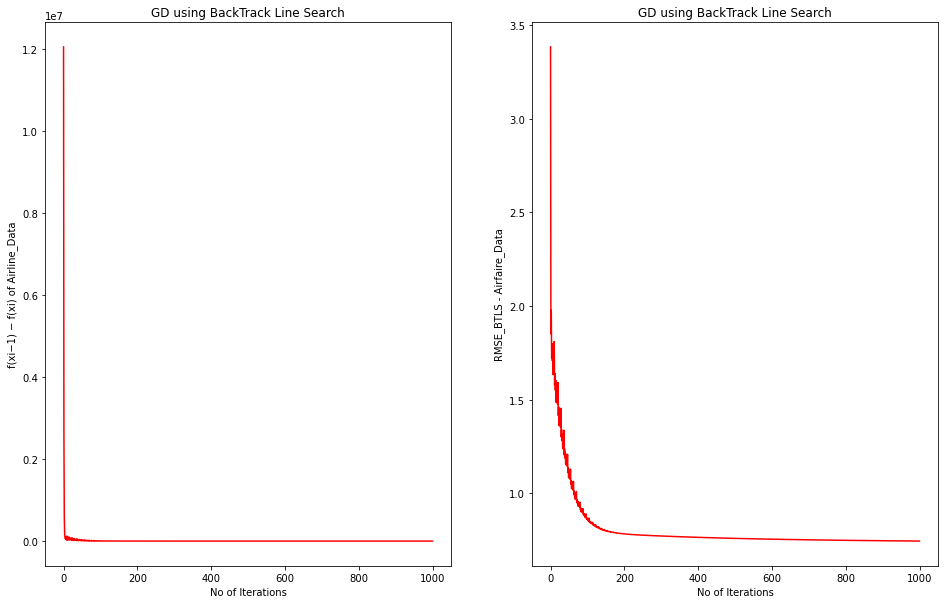

In [331]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using BackTrack Line Search')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Airline_Data')
ax[0].plot(result_BTLS, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using BackTrack Line Search')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BTLS - Airfaire_Data')
ax[1].plot(rmse_BTLS, 'red')

<p>Using ‘Backtrack line search’ the difference converged very quickly. However, it took some time for the RMSE to start converging to zero. The fluctuations in the plot can be interpreted as the change in step length in every iteration in order to choose the optimal step length by the algorithm</p>

#### Step length is calculated using the ‘Bold Drivers’ algorithm in each iteration of the gradient descent for the ‘Airfare and Demand’ dataset. The following results are obtained:

In [265]:
result_boltdriver,rmse_boltdriver = gradientD_boltdriver(X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data)

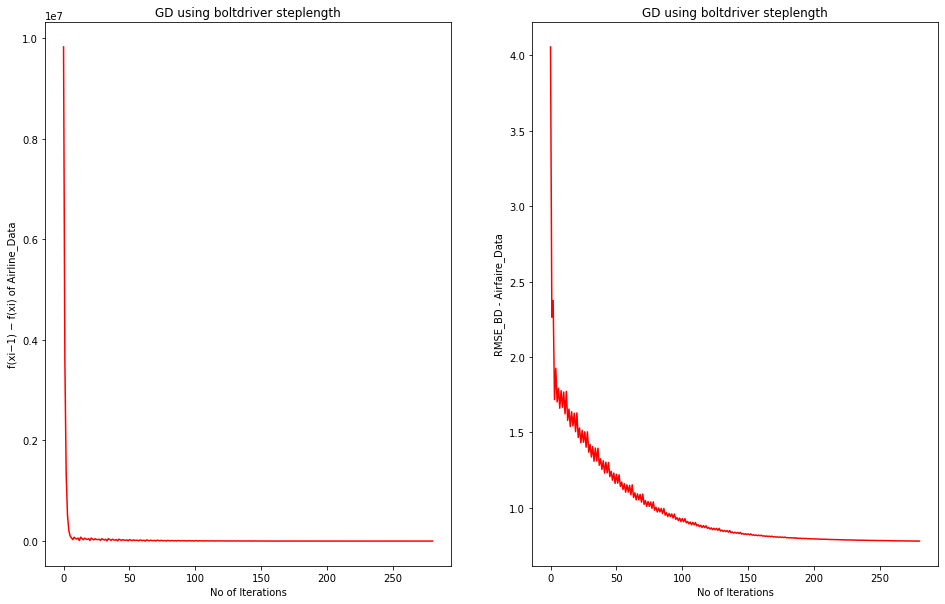

In [267]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using boltdriver steplength')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Airline_Data')
ax[0].plot(result_boltdriver, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using boltdriver steplength')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BD - Airfaire_Data')
ax[1].plot(rmse_boltdriver, 'red')

<p>The difference converged to zero earlier using the ‘Bold Drivers’ algorithm in about 250 iterations. The RMSE also converged faster using the ‘Bold Drivers’ algorithm in about 250 iterations, which is the <b>fastest among the three</b> in the ‘Airfare Demand’ dataset. However, the RMSE started converging after some 100 iterations in ‘Bold Drivers’ algorithm</p>

#### Step length is calculated using the Look Ahead optimizer in each iteration of the gradient descent for the ‘Airfare and Demand’ dataset. The following results are obtained:

In [342]:
result_LH, rmse_LH = gradientD_lookAhead(X_Train_Data,Y_Train_Data,X_Test_Data,Y_Test_Data)

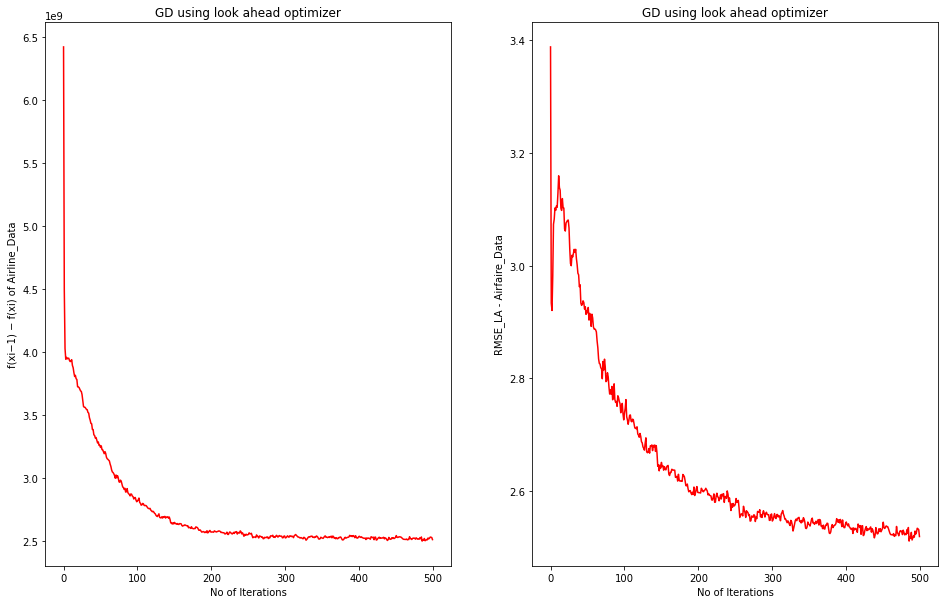

In [343]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using look ahead optimizer')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Airline_Data')
ax[0].plot(result_LH, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using look ahead optimizer')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_LA - Airfaire_Data')
ax[1].plot(rmse_LH, 'red')

<p>Using look ahead optimizer the difference does not converge to zero in 500 iterations. Also Rmse loss is not converged.I think reason for this behaviour is that I used simple gradient descent as internal optimizer for look ahead optimzer. This exercise is based on gradient descent so I used this algorithm as internal optimzer of look ahead optimzer. But in look ahead optimzer paper, the authors used SGD or Adam as internal optimizer for look ahead. They acheived good results on these internal optimizers. So, Results will be improved if we use Adam or SGD as internal optimizer of look ahead optimizer</p>

<hr style="border:2px solid gray"> </hr>

### Wine Quality Dataset:

#### Step length is calculated using the ‘Backtrack line search’ algorithm in each iteration of the gradient descent for the ‘Wine Quality’ dataset. The following results are obtained:

In [299]:
result_BTLS_W, rmse_BTLS_W = gradientD_BTLS(Xtrain_W, Ytrain_W, Xtest_W, Ytest_W)

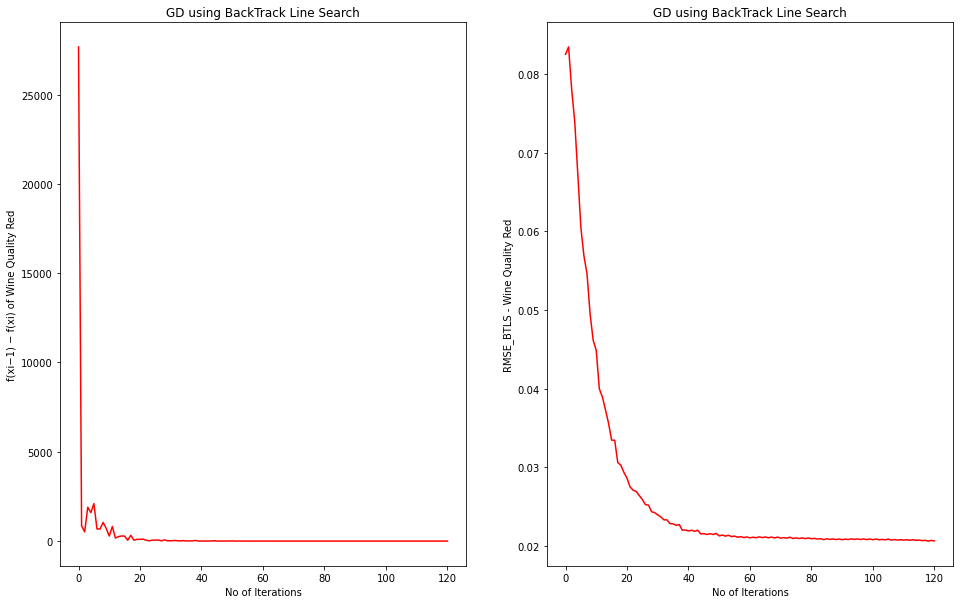

In [300]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using BackTrack Line Search')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Wine Quality Red')
ax[0].plot(result_BTLS_W, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using BackTrack Line Search')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BTLS - Wine Quality Red')
ax[1].plot(rmse_BTLS_W, 'red')

<p>Both the difference and RMSE converged in 120 iterations which is faster than in the gradient descent with fixed step length.</p>

#### Step length is calculated using the ‘Bold Drivers’ algorithm in each iteration of the gradient descent for the ‘Wine Quality’ dataset. The following results are obtained:

In [301]:
result_boltdriver_W,rmse_boltdriver_W = gradientD_boltdriver(Xtrain_W, Ytrain_W, Xtest_W, Ytest_W)

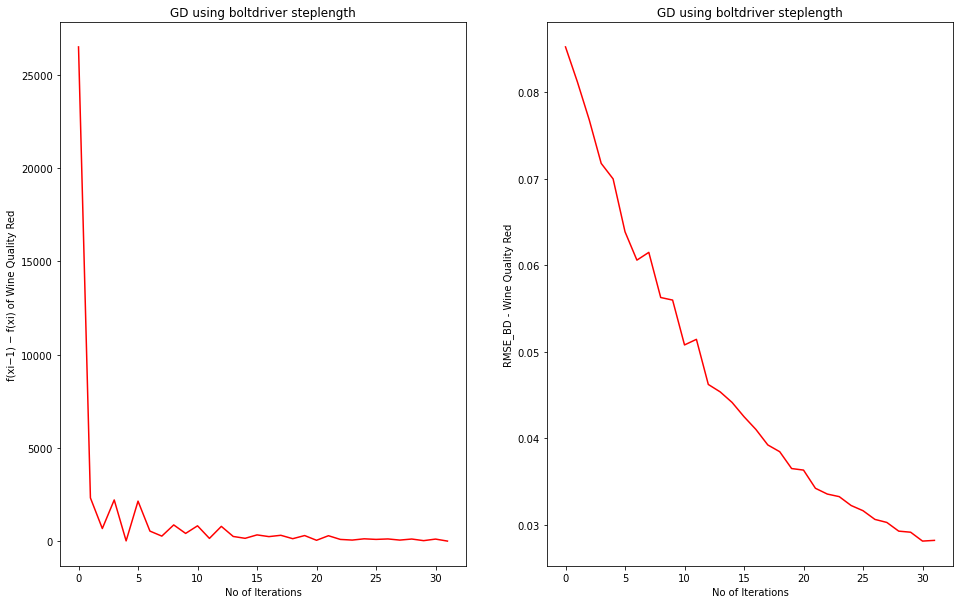

In [302]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using boltdriver steplength')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Wine Quality Red')
ax[0].plot(result_boltdriver_W, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using boltdriver steplength')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BD - Wine Quality Red')
ax[1].plot(rmse_boltdriver_W, 'red')

<p>Using the ‘Bold Drivers’ algorithm for step length, both the RMSE and the difference converge in 30 iterations. This is faster than the step length from the ‘Back-Track Line Search’ algorithm for the ‘Wine Quality’ dataset.</p>

#### Step length is calculated using the Look Ahead optimizer in each iteration of the gradient descent for the ‘Airfare and Demand’ dataset. The following results are obtained:

In [344]:
result_LH_W, rmse_LH_W = gradientD_lookAhead(Xtrain_W, Ytrain_W, Xtest_W, Ytest_W)

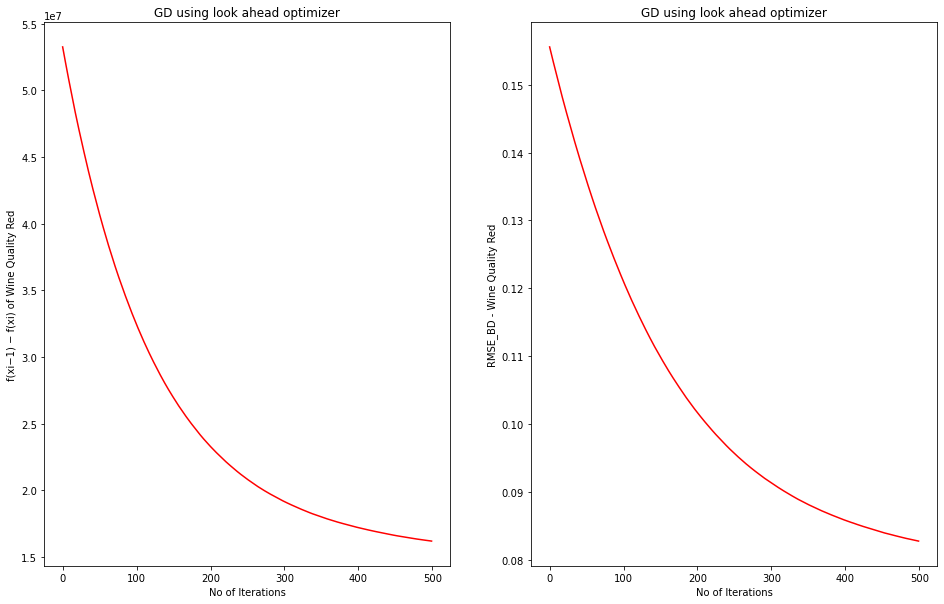

In [345]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using look ahead optimizer')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Wine Quality Red')
ax[0].plot(result_LH_W, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using look ahead optimizer')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BD - Wine Quality Red')
ax[1].plot(rmse_LH_W, 'red')

<p>Using look ahead optimizer, both the difference and  Rmse loss took more time to converge than previous step length algorithms.I think reason for this behaviour is that I used simple gradient descent as internal optimizer for look ahead optimzer. This exercise is based on gradient descent so I used this algorithm as internal optimzer of look ahead optimzer. But in look ahead optimzer paper, the authors used SGD or Adam as internal optimizer for look ahead. They acheived good results on these internal optimizers. So, Results will be improved if we use Adam or SGD as internal optimizer of look ahead optimizer</p>

<hr style="border:2px solid gray"> </hr>

## Parkisons Dataset:

##### Step length is calculated using the ‘Backtrack line search’ algorithm in each iteration of the gradient descent for the ‘Parkinsons’ dataset. The following results are obtained:

In [306]:
result_BTLS_P, rmse_BTLS_P = gradientD_BTLS(Xtrain_P, Ytrain_P, Xtest_P, Ytest_P)

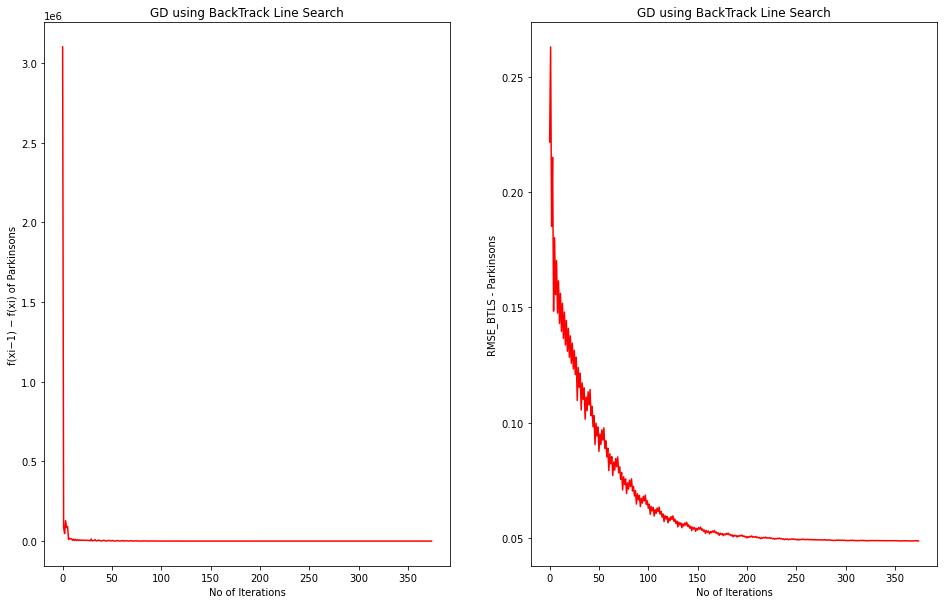

In [307]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using BackTrack Line Search')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Parkinsons')
ax[0].plot(result_BTLS_P, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using BackTrack Line Search')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BTLS - Parkinsons')
ax[1].plot(rmse_BTLS_P, 'red')

<p>Both the difference and the RMSE converge before 400 iterations which is faster than in the gradient descent with fixed step length</p>

#### Step length is calculated using the ‘Bold Drivers’ algorithm in each iteration of the gradient descent for the ‘Parkinsons’ dataset. The following results are obtained:

In [310]:
result_boltdriver_P,rmse_boltdriver_P = gradientD_boltdriver(Xtrain_P, Ytrain_P, Xtest_P, Ytest_P)

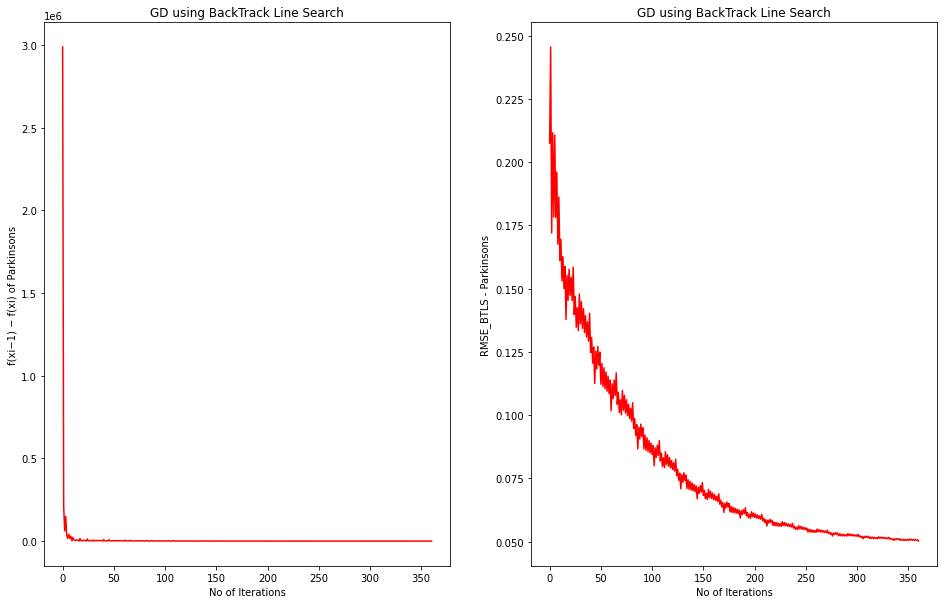

In [311]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using BackTrack Line Search')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of Parkinsons')
ax[0].plot(result_boltdriver_P, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using BackTrack Line Search')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BTLS - Parkinsons')
ax[1].plot(rmse_boltdriver_P, 'red')

<p>Both the difference and the RMSE converge in about 350 iterations. In the ‘Parkinsons’ dataset, the RMSE and difference converged almost on the same iterations using the ‘Bold Drivers’ algorithm for calculating step length for gradient descent when compared with the results using  ‘Back Track Line Search’ algorithm for step length.</p>

#### Step length is calculated using the Look Ahead optimizer in each iteration of the gradient descent for the ‘Airfare and Demand’ dataset. The following results are obtained:

In [314]:
result_LH_P, rmse_LH_P = gradientD_lookAhead(Xtrain_P, Ytrain_P, Xtest_P, Ytest_P)

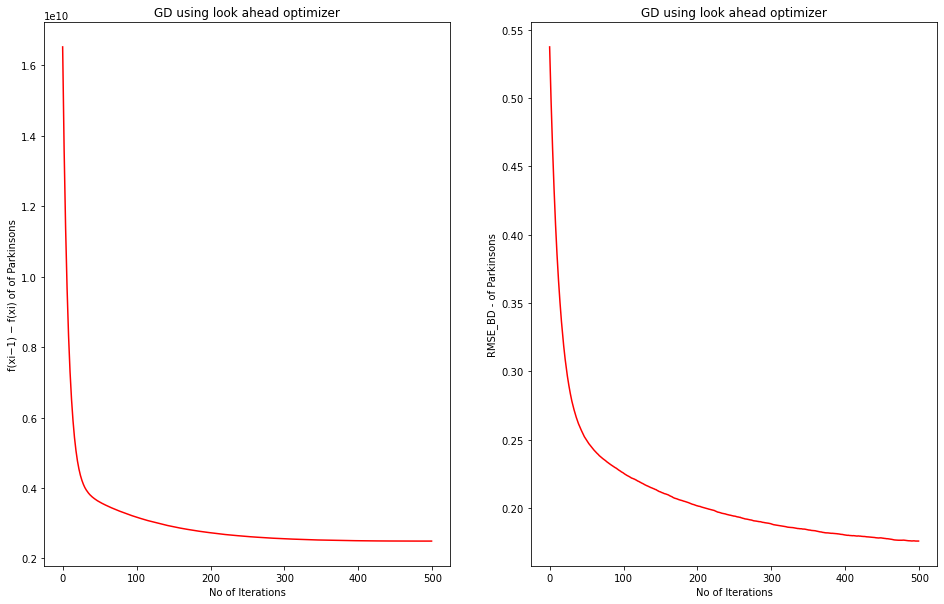

In [315]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

# Plotting epsilon
ax[0].set_title('GD using look ahead optimizer')
ax[0].set(xlabel='No of Iterations', ylabel='f(xi−1) − f(xi) of of Parkinsons')
ax[0].plot(result_LH_P, 'red')
    
# Plotting RMSE

ax[1].set_title('GD using look ahead optimizer')
ax[1].set(xlabel='No of Iterations', ylabel='RMSE_BD - of Parkinsons')
ax[1].plot(rmse_LH_P, 'red')

<p>Using look ahead optimizer, both the difference and  Rmse loss took more time to converge than previous step length algorithms.I think reason for this behaviour is that I used simple gradient descent as internal optimizer for look ahead optimzer. This exercise is based on gradient descent so I used this algorithm as internal optimzer of look ahead optimzer. But in look ahead optimzer paper, the authors used SGD or Adam as internal optimizer for look ahead. They acheived good results on these internal optimizers. So, Results will be improved if we use Adam or SGD as internal optimizer of look ahead optimizer</p>

<hr style="border:2px solid gray"> </hr>